# Cloud cover

In [19]:
# imports
import os
import numpy as np

from matplotlib import pyplot as plt

import pandas

# Load up the MODIS-L2 Table

In [4]:
modis_tbl_file = os.path.join(os.getenv('SST_OOD'), 'MODIS_L2', 'Tables', 'MODIS_L2_std.parquet')

In [5]:
modis_tbl = pandas.read_parquet(modis_tbl_file)

In [6]:
modis_tbl.head()

,lat,lon,col,datetime,LL,row,clear_fraction,mean_temperature,Tmin,Tmax,...,pp_root,field_size,pp_type,pp_idx,U0,U1,zonal_slope,merid_slope,zonal_slope_err,merid_slope_err
0,13.980967,62.675774,517,2003-03-10 21:25:00,520.178711,304,0.000000,26.199476,25.250000,26.885000,...,standard,128,0,0,-1.551078,-0.694188,-1.186275,-2.126147,0.137467,0.224244
1,13.043748,-102.751816,706,2003-12-12 08:30:00,432.766724,1696,0.049805,28.924648,27.789999,29.654999,...,standard,128,0,1,4.891690,5.098271,-0.678604,-0.904867,0.115963,0.128991
2,-18.086618,40.844833,581,2003-09-24 22:35:00,764.413086,656,0.006104,25.551611,24.775000,26.154999,...,standard,128,0,2,5.163661,5.632052,-0.723022,-0.590398,0.076410,0.052984
3,39.071575,18.569141,1028,2003-05-01 01:05:00,371.310120,898,0.049988,16.414951,15.160000,17.205000,...,standard,128,0,3,1.839757,3.827878,-1.370202,-1.285166,0.187732,0.101415
4,17.901926,90.155480,997,2003-12-05 19:55:00,-214.759277,1520,0.035461,26.744499,24.975000,28.724998,...,standard,128,0,4,-1.020937,-1.186668,-1.902952,-2.023731,0.232980,0.235537


In [11]:
modis_tbl.keys()

Index(['lat', 'lon', 'col', 'datetime', 'LL', 'row', 'clear_fraction',
       'mean_temperature', 'Tmin', 'Tmax', 'T90', 'T10', 'filename', 'UID',
       'pp_file', 'pp_root', 'field_size', 'pp_type', 'pp_idx', 'U0', 'U1',
       'zonal_slope', 'merid_slope', 'zonal_slope_err', 'merid_slope_err'],
      dtype='object')

# Explore Cloud Cover

In [7]:
modis_tbl.clear_fraction

0           0.000000
1           0.049805
2           0.006104
3           0.049988
4           0.035461
              ...   
12493756    0.046143
12493757    0.049744
12493758    0.042664
12493759    0.049622
12493760    0.047791
Name: clear_fraction, Length: 12493761, dtype: float64

In [12]:
modis_tbl['DT'] = modis_tbl.T90 - modis_tbl.T10

## T, LL cuts

In [13]:
T_cut = modis_tbl.DT > 3.
LL_cut = modis_tbl.LL < -1000.

In [23]:
#cf_vals = [0.05, 0.04, 0.03, 0.02, 0.01, 0.]
cf_vals = np.linspace(0., 0.05, 50) 

In [24]:
sv_fracs = []
for cf_val in cf_vals:
    cf_cut = modis_tbl.clear_fraction <= cf_val
    # Stats time
    nTot = np.sum(cf_cut)
    nCut = np.sum(cf_cut & T_cut & LL_cut)
    # Print
    print(f'cf_val: {cf_val}, nOut={nCut}, nTot={nTot}, frac={nCut/nTot}')
    #
    sv_fracs.append(nCut/nTot)

cf_val: 0.0, nOut=3, nTot=1253919, frac=2.3924990370191376e-06
cf_val: 0.0010204081632653062, nOut=10, nTot=2072670, frac=4.824694717441754e-06
cf_val: 0.0020408163265306124, nOut=13, nTot=2451619, frac=5.3026183921726826e-06
cf_val: 0.0030612244897959186, nOut=20, nTot=2733237, frac=7.317331062033772e-06
cf_val: 0.004081632653061225, nOut=32, nTot=2957177, frac=1.0821131099017745e-05
cf_val: 0.005102040816326531, nOut=47, nTot=3168182, frac=1.48350063222378e-05
cf_val: 0.006122448979591837, nOut=74, nTot=3359644, frac=2.2026143246129648e-05
cf_val: 0.0071428571428571435, nOut=106, nTot=3536308, frac=2.9974764641541404e-05
cf_val: 0.00816326530612245, nOut=132, nTot=3692997, frac=3.5743327167609397e-05
cf_val: 0.009183673469387756, nOut=174, nTot=3851000, frac=4.518306933264087e-05
cf_val: 0.010204081632653062, nOut=217, nTot=4002564, frac=5.421524802601532e-05
cf_val: 0.011224489795918368, nOut=263, nTot=4140085, frac=6.352526578560586e-05
cf_val: 0.012244897959183675, nOut=305, nTot=

## Plot

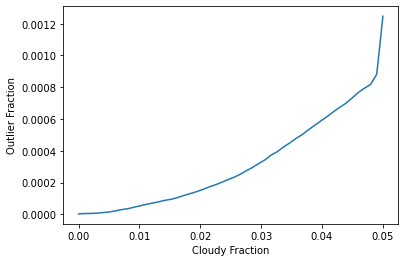

In [25]:
plt.clf()
ax = plt.gca()
ax.plot(cf_vals, sv_fracs)
#
ax.set_xlabel('Cloudy Fraction')
ax.set_ylabel('Outlier Fraction')
#
plt.savefig('outlier_fraction.png', dpi=200)
plt.show()

In [22]:
15500./208

74.51923076923077

In [26]:
modis_tbl.clear_fraction.max()

0.04998779296875